In [91]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df_original = pd.read_csv("AviationData.csv", encoding="ISO-8859-1")

C:\Users\Admin\AppData\Local\Temp\ipykernel_8828\2124772063.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv("AviationData.csv", encoding="ISO-8859-1")


In [32]:
# create a copy of may df_original to keep the original dataframe intact 
df = df_original.copy()

In [93]:
# Display the first five rows
df.head(3)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.000000,0.000000,0.00000,UNK,Probable Cause,Unknown,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.000000,0.000000,0.00000,UNK,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,0.279881,0.357061,5.32544,IMC,Probable Cause,26-02-2007,1974


In [34]:
df.shape

(88889, 31)

In [35]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [36]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [38]:
# Checking the number of missing values in each column
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [39]:
# Drop columns with too many missing values
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description',
                   'Schedule', 'Air.carrier', 'Broad.phase.of.flight']

df = df.drop(columns=columns_to_drop)

In [40]:
df.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'Publication.Date'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Registration.Number     87507 non-null  object 
 9   Make                    88826 non-null  object 
 10  Model                   88797 non-null  object 
 11  Amateur.Built           88787 non-null  object 
 12  Number.of.Engines       82805 non-null  float64
 13  Engine.Type             81793 non-null  object 
 14  Purpose.of.flight       82697 non-null

In [42]:
categorical_cols = ['Location', 'Country', 'Injury.Severity', 'Aircraft.damage', 
                    'Make', 'Model', 'Amateur.Built', 'Engine.Type', 
                    'Purpose.of.flight', 'Weather.Condition', 'Registration.Number', 'Report.Status', 'Publication.Date']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

In [43]:
numeric_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 
                'Total.Minor.Injuries', 'Total.Uninjured', 'Number.of.Engines']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [44]:
df.isnull().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
Publication.Date          0
dtype: int64

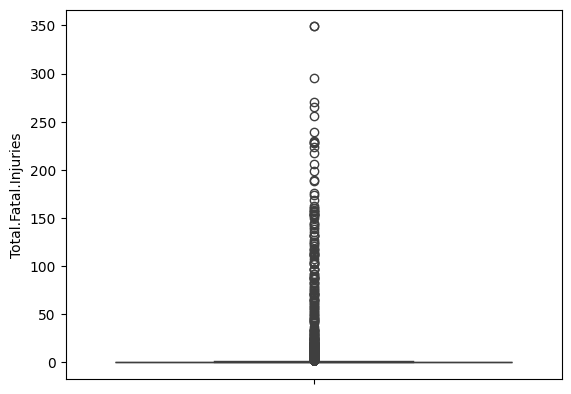

In [87]:
# detect outliers
sns.boxplot(df['Total.Fatal.Injuries'])  # Visualize outliers in fatalities
plt.show()


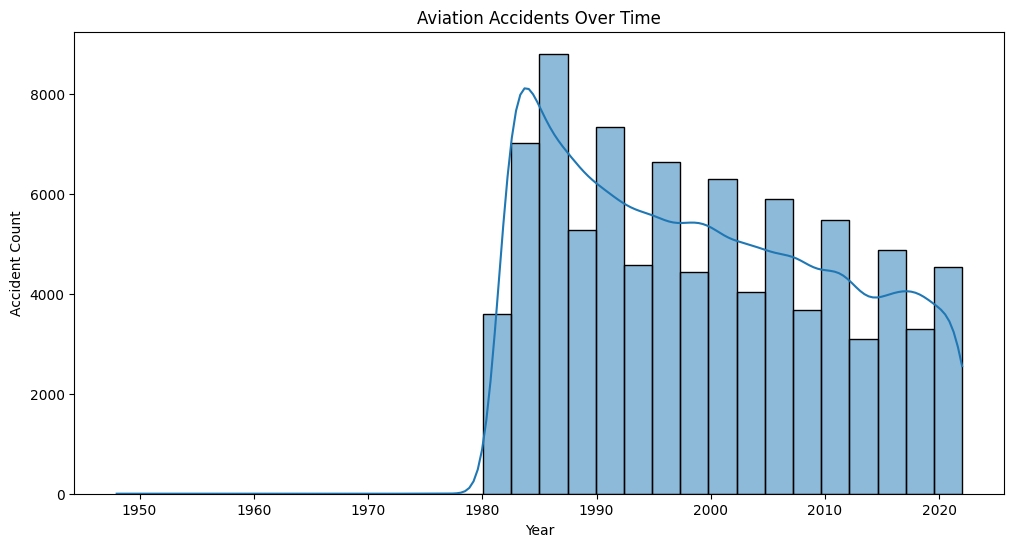

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Event.Date'] = pd.to_datetime(df['Event.Date'])  # Convert to datetime
df['Year'] = df['Event.Date'].dt.year  # Extract the year

plt.figure(figsize=(12,6))
sns.histplot(df['Year'], bins=30, kde=True)
plt.title("Aviation Accidents Over Time")
plt.xlabel("Year")
plt.ylabel("Accident Count")
plt.show()


### Accident trends over time

### Geographical distribution of accidents

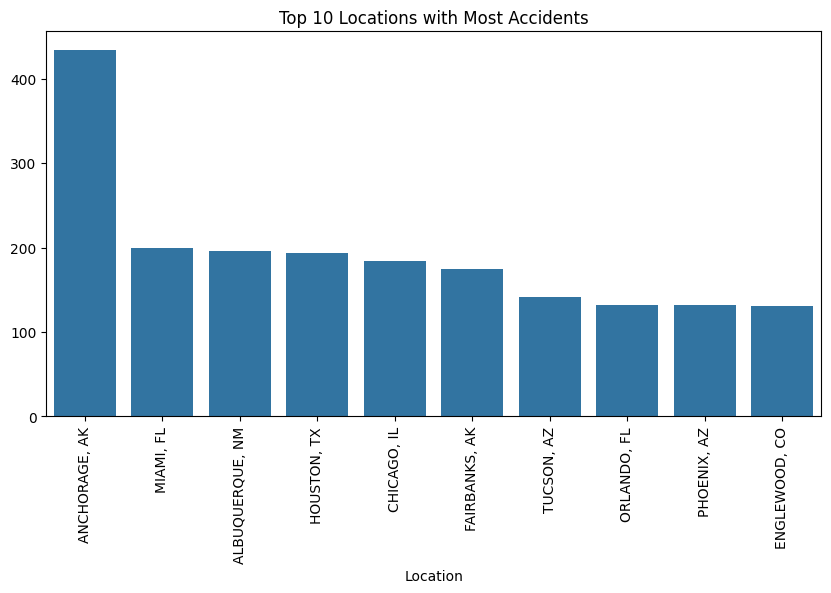

In [48]:
accident_counts = df['Location'].value_counts().head(10)  # Adjust based on dataset
plt.figure(figsize=(10,5))
sns.barplot(x=accident_counts.index, y=accident_counts.values)
plt.xticks(rotation=90)
plt.title("Top 10 Locations with Most Accidents")
plt.show()

### Aircraft types involved

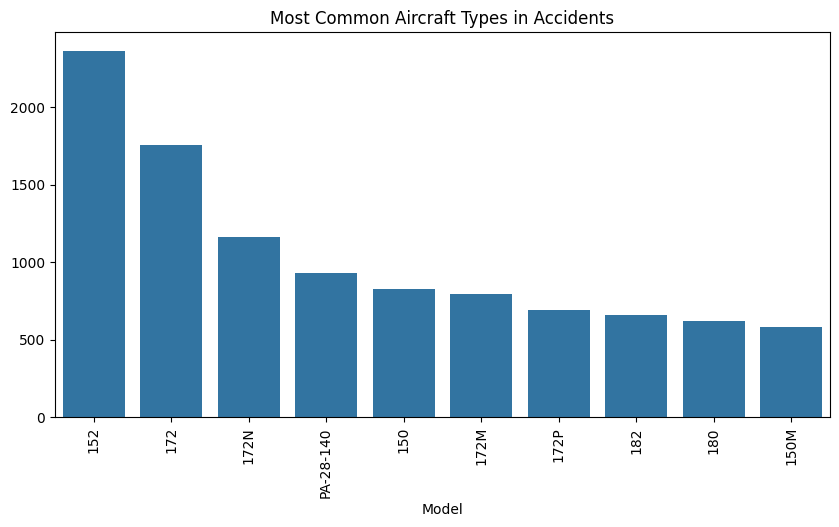

In [50]:
aircraft_counts = df['Model'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=aircraft_counts.index, y=aircraft_counts.values)
plt.xticks(rotation=90)
plt.title("Most Common Aircraft Types in Accidents")
plt.show()

### manufacture analysis

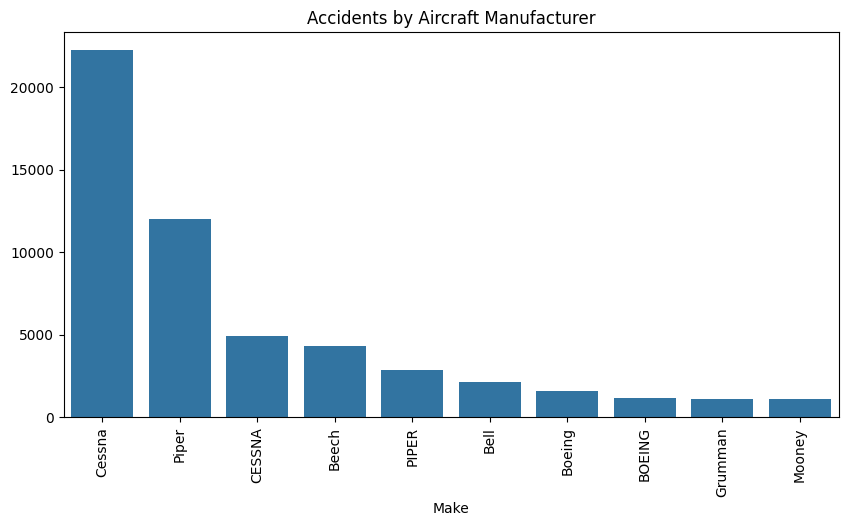

In [81]:
manufacturer_counts = df['Make'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=manufacturer_counts.index, y=manufacturer_counts.values)
plt.xticks(rotation=90)
plt.title("Accidents by Aircraft Manufacturer")
plt.show()


In [95]:

df.to_csv("aviation_data.csv", index=False)
